In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = pd.read_csv('Data/boston.csv')

In [17]:
X = df[['AGE', 'LSTAT']].values
y = df['MEDV'].values

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = LinearRegression()

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('regressor', model)  # Linear Regression
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [19]:
y_train_pred = pipeline.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Calculate R-squared for the test data 4.566213908719438
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (R2) for Training Data:", r2_train)
print("R-squared (R2) for Test Data:", r2_test)

R-squared (R2) for Training Data: 0.5630979953818331
R-squared (R2) for Test Data: -1220.2008840069036


In [20]:
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mae_train =metrics.mean_absolute_error(y_train, y_train_pred)
# Print the MAE scores and comments
print("Mean Absolute Error (MAE) for Training Data:", mae_train)
print("Mean Absolute Error (MAE) for Test Data:", mae_test)

Mean Absolute Error (MAE) for Training Data: 4.566213908719433
Mean Absolute Error (MAE) for Test Data: 203.96151344904555


In [21]:
rmse_train = metrics.mean_squared_error(y_train,y_train_pred)
# Calculate RMSE for the test data
rmse_test = metrics.mean_squared_error(y_test,y_test_pred)

# Print the RMSE scores
print("Root Mean Squared Error (RMSE) for Training Data:", rmse_train)
print("Root Mean Squared Error (RMSE) for Test Data:", rmse_test)

Root Mean Squared Error (RMSE) for Training Data: 38.20805667876179
Root Mean Squared Error (RMSE) for Test Data: 80819.18366513227


In [22]:
mape_train = metrics.mean_absolute_percentage_error(y_train,y_train_pred)

mape_test = metrics.mean_absolute_percentage_error(y_test,y_test_pred)
print( mape_train)
print( mape_test)

0.2182889452914897
14.357394078443072


In [23]:
print("Score or R-Squared:",model.score(X_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared: -1220.2008840069036
Mean Absolute Error: 203.96151344904555
Mean Squared Error: 80819.18366513227
Root Mean Squared Error: 284.28715001760503
Mean Absolute Percentage Error: 14.357394078443072


<Axes: >

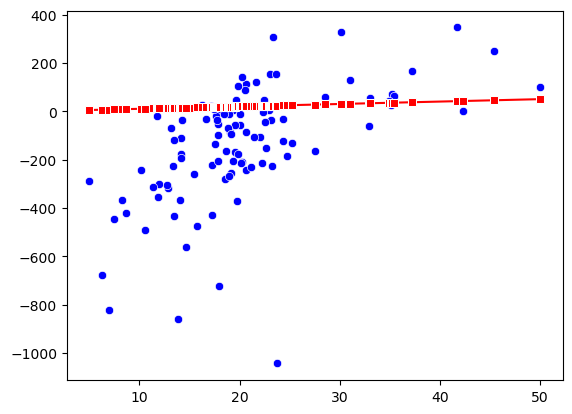

In [24]:
sb.lineplot(x=y_test.flatten(), y=y_test.flatten(), marker='s', color='r')
sb.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(), marker='o', color='b')


In [26]:
y_test_pred = model.predict(X_test)
dfTestValidation = pd.DataFrame(list(zip(X_test[: ,0], X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns = ['AGE&ISTAT_test', 'MEDV_test', 'y_test', 'y_test_predicted'])
dfTestValidation['Residual'] = dfTestValidation['y_test']- dfTestValidation['y_test_predicted']
dfTestValidation


,AGE&ISTAT_test,MEDV_test,y_test,y_test_predicted,Residual
0,100.0,7.39,23.3,307.659789,-284.359789
1,93.9,22.88,12.8,-318.619787,331.419787
2,77.8,29.97,6.3,-679.657752,685.957752
3,51.8,6.58,35.2,69.227216,-34.027216
4,98.4,14.59,17.1,23.459777,-6.359777
...,...,...,...,...,...
97,88.4,14.65,17.7,-34.725946,52.425946
98,25.8,9.97,19.3,-205.692072,224.992072
99,94.9,21.45,15.4,-258.361436,273.761436
100,95.4,15.03,18.4,-10.129076,28.529076


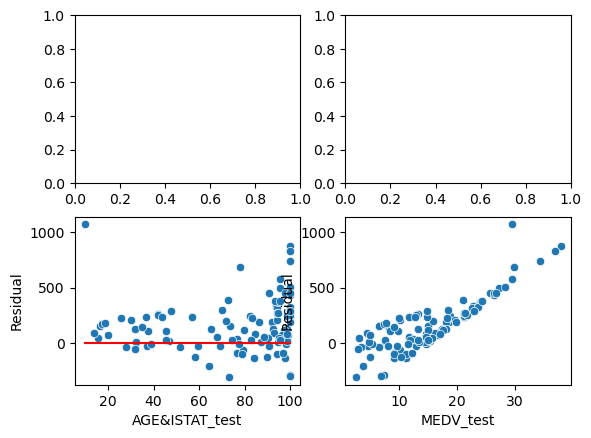

In [27]:
fig,axes = plt.subplots(2,2)
sb.scatterplot(data=dfTestValidation,x='AGE&ISTAT_test',y='Residual',ax=axes[1,0])
sb.lineplot(data=dfTestValidation,x='AGE&ISTAT_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sb.scatterplot(data=dfTestValidation,x='MEDV_test',y='Residual',ax=axes[1,1])
plt.show()

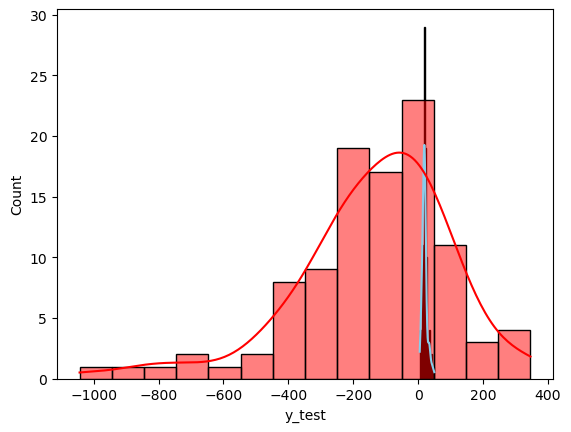

In [28]:
sb.histplot(data=dfTestValidation,x='y_test',color='skyblue',label='Actual',kde=True)
sb.histplot(data=dfTestValidation,x='y_test_predicted',color='red',label='Forecast',kde=True)
plt.show()